### This file plots the processed csv files with matplotlib

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [62]:
date = '2018-11-22_18h12'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/' + date + '/'

In [63]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## Response-time plot for sharded get requests

In [64]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'mem_rt.csv')
df_rt

,client,worker,ratio,sharded_rt_mean,sharded_rt_std,nonsharded_rt_mean,nonsharded_rt_std
0,12,64,1:1,1.460000,0.006804,1.495556,0.036371
1,12,64,1:3,2.398333,0.085060,1.970000,0.084864
2,12,64,1:6,4.821667,0.055728,3.968889,0.023895
3,12,64,1:9,7.828333,0.004082,5.844444,0.034030


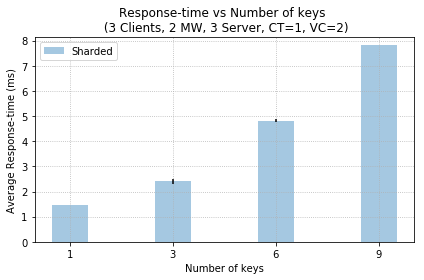

In [65]:
n_groups = 4

means_latency = df_rt['sharded_rt_mean']
std_latency = df_rt['sharded_rt_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_latency, bar_width,
                alpha=opacity,
                yerr=std_latency,
                label='Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Response-time vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_latency)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_rt_sharded.png", dpi = 150)


## Response-time plot for non-sharded get requests

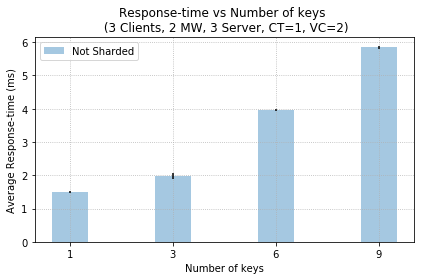

In [66]:
n_groups = 4

means_latency = df_rt['nonsharded_rt_mean']
std_latency = df_rt['nonsharded_rt_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_latency, bar_width,
                alpha=opacity,
                yerr=std_latency,
                label='Not Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Response-time vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_latency)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_rt_nonsharded.png", dpi = 150)


## Percentile plot for sharded get requests

In [67]:
# read data into pandas dataframe
df_perc = pd.read_csv(base_path + 'mem_percentiles.csv')
df_perc

,client,worker,ratio,s_25_mean,s_25_std,s_50_mean,s_50_std,s_75_mean,s_75_std,s_90_mean,...,n_25_mean,n_25_std,n_50_mean,n_50_std,n_75_mean,n_75_std,n_90_mean,n_90_std,n_99_mean,n_99_std
0,12,64,1:1,1.010556,0.008315,1.177778,0.020787,1.433333,0.013608,1.966667,...,1.014444,0.010999,1.188889,0.031427,1.461111,0.015713,2.066667,0.082776,6.100000,0.219004
1,12,64,1:3,1.222222,0.007857,1.466667,0.013608,2.061111,0.028328,4.755556,...,1.216667,0.013608,1.455556,0.028328,1.844444,0.056656,3.116667,0.400925,8.416667,0.909518
2,12,64,1:6,1.633333,0.023570,2.194444,0.041574,8.638889,0.338114,11.000000,...,1.577778,0.007857,2.016667,0.013608,4.127778,0.103935,11.000000,0.000000,15.166667,0.000000
3,12,64,1:9,1.811111,0.007857,8.122222,0.020787,12.777778,0.078567,13.833333,...,1.700000,0.013608,2.327778,0.047791,9.372222,0.333426,14.833333,0.000000,27.833333,0.235702


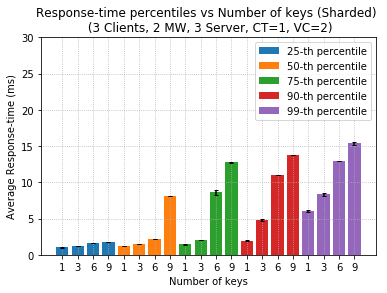

In [101]:
f = plt.figure()
plt.title("Response-time percentiles vs Number of keys (Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of keys")

percentiles = [25,50,75,90,99]

for start_idx in [0,1,2,3,4]:
    percentile = percentiles[start_idx]
    vals = df_perc['s_{}_mean'.format(percentile)]
    err = df_perc['s_{}_std'.format(percentile)]

    plt.bar(x = range(1 + start_idx*4, 1 + (start_idx + 1)*4), 
            height = vals, yerr = err, capsize = 2, label='{}-th percentile'.format(percentile))
    
plt.xticks(range(1, 21), [1,3,6,9] * 5)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.ylim(bottom=0, top=30)
plt.show() 
    
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_perc_sharded.png", dpi = 150)

    

## Percentile plot for non-sharded get requests

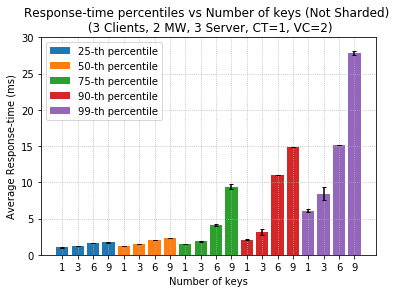

In [100]:
f = plt.figure()
plt.title("Response-time percentiles vs Number of keys (Not Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of keys")

percentiles = [25,50,75,90,99]

for start_idx in [0,1,2,3,4]:
    percentile = percentiles[start_idx]
    vals = df_perc['n_{}_mean'.format(percentile)]
    err = df_perc['n_{}_std'.format(percentile)]

    plt.bar(x = range(1 + start_idx*4, 1 + (start_idx + 1)*4), 
            height = vals, yerr = err, capsize = 2, label='{}-th percentile'.format(percentile))
    
plt.xticks(range(1, 21), [1,3,6,9] * 5)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.ylim(bottom=0, top=30)
plt.show() 
    
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_perc_nonsharded.png", dpi = 150)

    

## Import histogram data

In [93]:
# read data into pandas dataframe
df_hist = pd.read_csv(base_path + 'mem_histogram.csv')
df_hist

,client,mw,sharded,ratio,latency,weight
0,1,1,True,1:6,1,0.00
1,1,1,True,1:6,2,0.00
2,1,1,True,1:6,3,0.00
3,1,1,True,1:6,4,0.00
4,1,1,True,1:6,5,0.00
5,1,1,True,1:6,6,0.00
6,1,1,True,1:6,7,0.00
7,1,1,True,1:6,8,0.00
8,1,1,True,1:6,9,0.00
9,1,1,True,1:6,10,0.25


## Histogram sharded get requests

In [114]:
df_s = df_hist[(df_hist['sharded']==True) & (df_hist['client']==3) & (df_hist['mw']==2)] 

In [116]:
df_s = df_hist[(df_hist['sharded']==True)] 

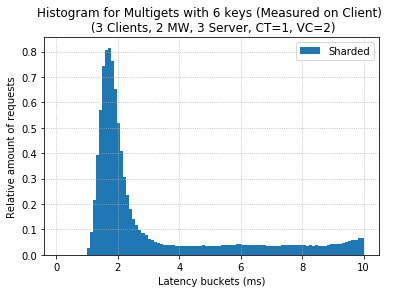

In [117]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on Client) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_s['latency']/10,bins=100,weights=df_s['weight'], density=True, label='Sharded',rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_histogram_sharded.png", dpi = 150)


## Histogram non-sharded get requests

In [122]:
df_n = df_hist[(df_hist['sharded']==False) & (df_hist['client']==3) & (df_hist['mw']==1)] 

In [124]:
df_n = df_hist[(df_hist['sharded']==False)] 

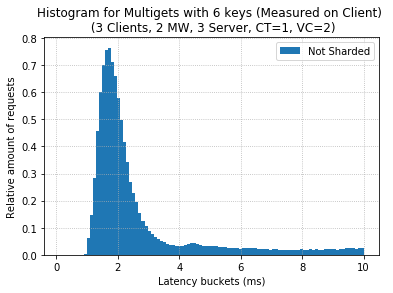

In [125]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on Client) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_n['latency']/10,bins=100,weights=df_n['weight'], density=True, label='Not Sharded', rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mem_histogram_nonsharded.png", dpi = 150)
